In [85]:
# Import Meteostat library and dependencies
import pandas as pd
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Stations, Point, Daily, Hourly

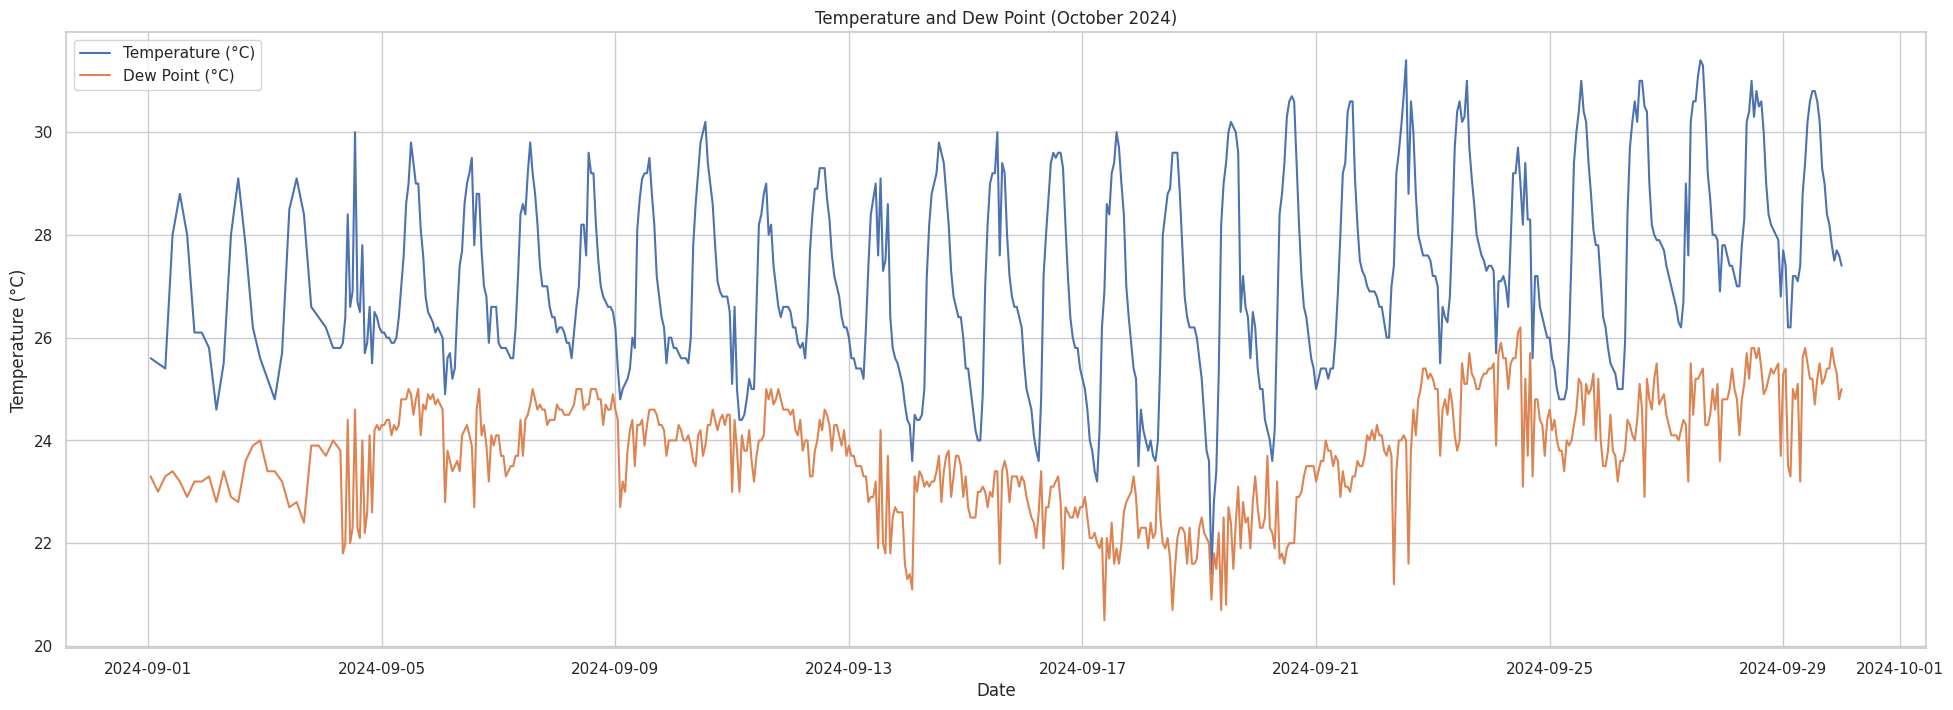

In [86]:
# Set seaborn theme
sns.set(style="whitegrid")

# Set time period
start = datetime(2024, 9, 1)
end = datetime(2024, 9, 30)

# Get hourly data
data = Hourly(96805, start, end,"Asia/Jakarta")
data = data.fetch()

# Plot line chart with custom figure size
plt.figure(figsize=(24, 8))

# Plot temperature and dew point with labels
plt.plot(data.index, data['temp'], label='Temperature (°C)')
plt.plot(data.index, data['dwpt'], label='Dew Point (°C)')

# Show the plot with seaborn styling
plt.title('Temperature and Dew Point (October 2024)')
plt.xlabel('Date')
plt.ylabel('Temperature (°C)')
plt.legend()  # Menambahkan legenda untuk penjelasan garis
plt.show()

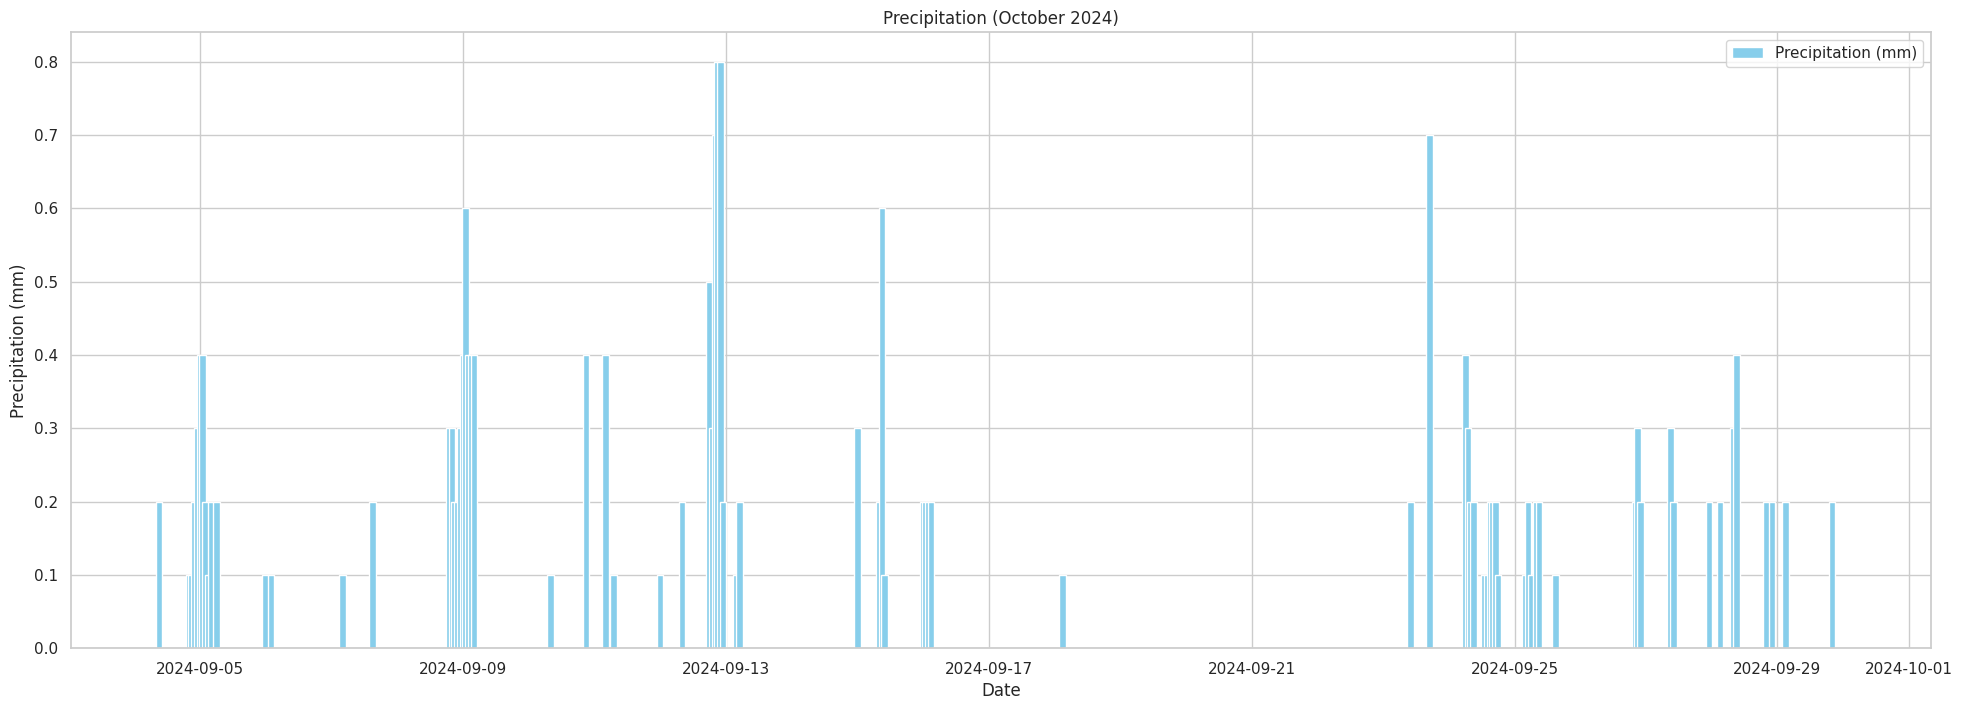

In [88]:
# Set seaborn theme
sns.set(style="whitegrid")

# Atur ukuran figure yang lebih besar
plt.figure(figsize=(24, 8))

# Plot precipitation menggunakan bar chart dengan lebar yang lebih kecil
plt.bar(data.index, data['prcp'], width=0.1, label='Precipitation (mm)', color='skyblue')  # width diatur ke 0.5

# Set judul dan label
plt.title('Precipitation (October 2024)')
plt.xlabel('Date')
plt.ylabel('Precipitation (mm)')
plt.legend()  # Menambahkan legenda untuk menjelaskan variabel

# Tampilkan grafik
plt.show()


In [60]:
data.describe()

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco
count,649.000000,649.000000,649.000000,623.000000,0.0,649.000000,649.000000,0.0,649.000000,0.0,623.000000
mean,27.225116,23.793220,82.044684,0.032584,NaN,107.958398,8.511402,NaN,1011.523883,NaN,3.926164
std,1.814346,1.095142,8.250113,0.103076,NaN,60.551553,5.738619,NaN,1.717305,NaN,3.773022
min,21.400000,20.500000,59.000000,0.000000,NaN,0.000000,0.000000,NaN,1006.700000,NaN,1.000000
25%,25.900000,23.100000,76.000000,0.000000,NaN,100.000000,3.600000,NaN,1010.400000,NaN,3.000000
50%,27.000000,23.900000,84.000000,0.000000,NaN,120.000000,9.400000,NaN,1011.500000,NaN,3.000000
75%,28.700000,24.600000,89.000000,0.000000,NaN,140.000000,11.200000,NaN,1012.700000,NaN,3.000000
max,31.400000,26.200000,98.000000,0.800000,NaN,340.000000,27.400000,NaN,1015.800000,NaN,17.000000


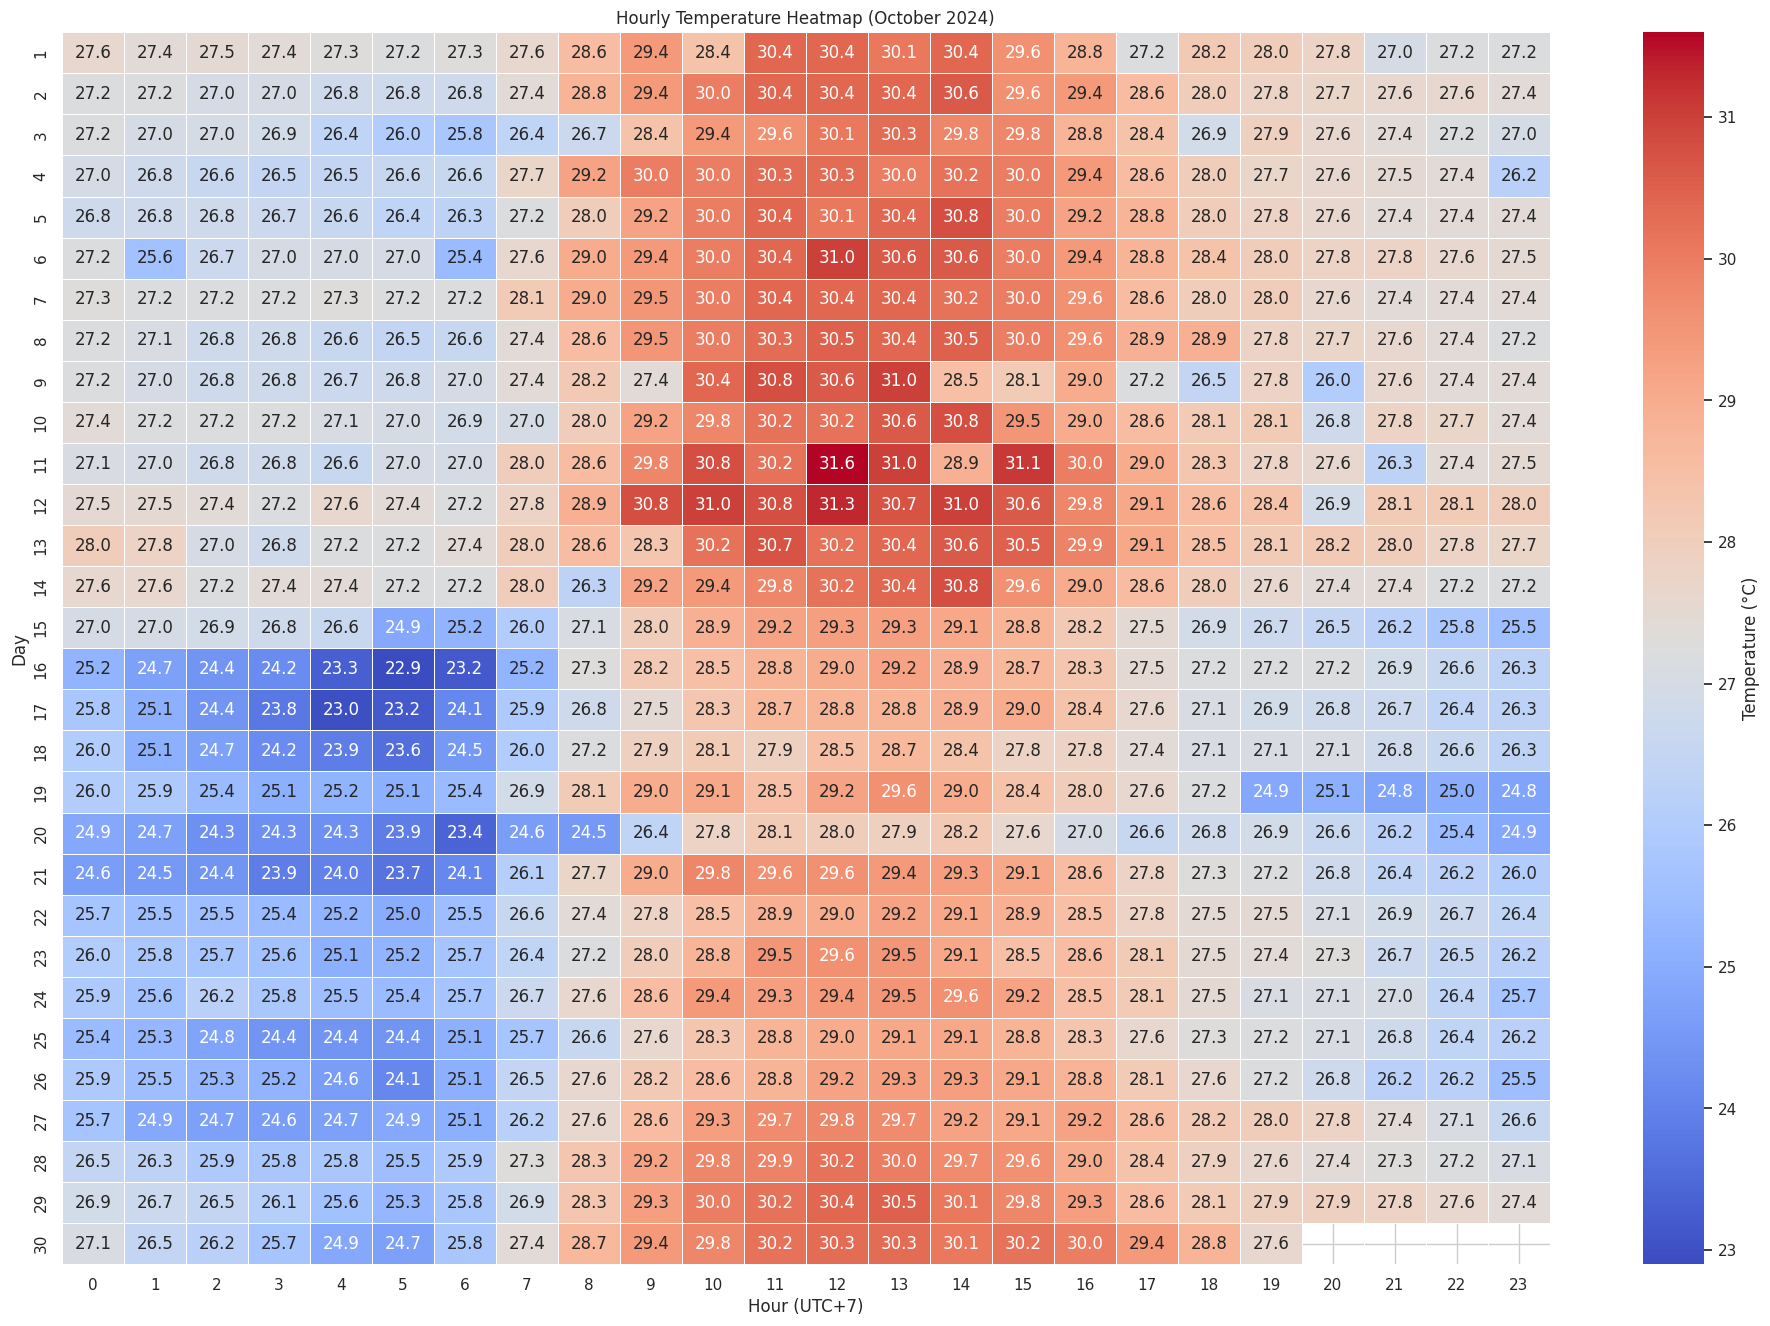

In [89]:
# Set seaborn theme
sns.set_theme(style="whitegrid")

# Set time period for a single month, e.g., October 2024
start = datetime(2024, 10, 1)
end = datetime(2024, 10, 31)

# Get hourly data and calculate daily average temperature for the specified month
data = Hourly(96805, start, end, "Asia/Jakarta").fetch()
data['date'] = data.index.date  # Konversi indeks ke tanggal untuk pengelompokan harian
data['day'] = data.index.day
data['hour'] = data.index.hour

# Menghitung rata-rata suhu setiap jam dalam sehari untuk setiap hari di bulan tersebut
temperature_pivot = data.pivot_table(index='day', columns='hour', values='temp')

# Mengatur ukuran grafik
f, ax = plt.subplots(figsize=(24, 16))

# Membuat heatmap dengan anotasi nilai di setiap sel
sns.heatmap(temperature_pivot, 
            annot=True, 
            fmt=".1f", 
            linewidths=.5, 
            ax=ax, 
            cmap="coolwarm",
            cbar_kws={'label': 'Temperature (°C)'})

# Memberi label pada sumbu
ax.set_xlabel('Hour (UTC+7)')
ax.set_ylabel('Day')
ax.set_title('Hourly Temperature Heatmap (October 2024)')

# Menampilkan heatmap
plt.show()


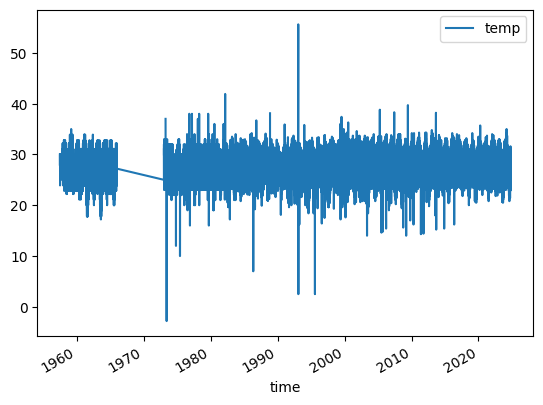

In [32]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Hourly

Hourly.chunked = True

data = Hourly('96805')
data = data.normalize()
data = data.fetch()

data.plot(y=['temp'])
plt.show()

In [90]:
data.tail(5)

,temp,dwpt,rhum,prcp,snow,wdir,wspd,wpgt,pres,tsun,coco,date,day,hour
time,,,,,,,,,,,,,,
2024-10-30 15:00:00+07:00,30.2,23.1,66.0,0.0,NaN,153.0,20.9,NaN,1008.4,NaN,3.0,2024-10-30,30,15
2024-10-30 16:00:00+07:00,30.0,23.2,67.0,0.0,NaN,151.0,22.0,NaN,1008.2,NaN,3.0,2024-10-30,30,16
2024-10-30 17:00:00+07:00,29.4,22.6,67.0,0.0,NaN,140.0,22.3,NaN,1008.7,NaN,3.0,2024-10-30,30,17
2024-10-30 18:00:00+07:00,28.8,22.8,70.0,0.0,NaN,133.0,22.7,NaN,1009.4,NaN,3.0,2024-10-30,30,18
2024-10-30 19:00:00+07:00,27.6,23.2,77.0,0.0,NaN,120.0,23.0,NaN,1010.7,NaN,3.0,2024-10-30,30,19


In [79]:
# Import Meteostat library and dependencies
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Normals

# Get Normals data
data = Normals('96805', (1984), 2024)
data = data.fetch()

# Plot line chart including average, minimum and maximum temperature
data.plot(y=['tavg', 'tmin', 'tmax'])
plt.show()

ValueError: Invalid reference period

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=200afad5-8991-4e20-8a55-8751c7aff3b5' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>